In [2]:
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import re
from scipy import signal
from sklearn.linear_model import LinearRegression
import random
plt.rcParams['pdf.fonttype'] = 42


    cell asymmetry  length strain
0      0  0.167454  15.879    365
1      2  0.288174  10.688    365
2      4  0.202365  16.574    365
3      6  0.092646  19.472    365
4      8  0.278252  15.008    365
..   ...       ...     ...    ...
120   26  0.047065  12.366    000
121   28   0.03455  14.269    000
122   30   0.04029  12.708    000
123   32  0.042236  12.738    000
124   34  0.089756   14.35    000

[125 rows x 4 columns]


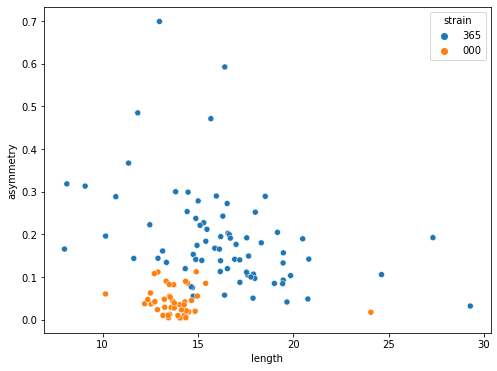

<Figure size 432x288 with 0 Axes>

In [3]:
dirs = glob.glob("./HS*")
data_length = pd.DataFrame({})
for dir in dirs:
    csvs = glob.glob(dir + "\Results*.csv")

    for csv in csvs:
        temp_length = pd.read_csv(csv)
        length_list = temp_length["Length"].tolist()
        for i in range(len(length_list)):
            if i % 2 == 1:
                continue
            tot_length = length_list[i] + length_list[i + 1]
            diff_length = abs(length_list[i] - length_list[i + 1])
            asym_index = diff_length / tot_length

            temp = pd.DataFrame([[i], [asym_index], [tot_length], [dir[4:]]], index=["cell", "asymmetry", "length", "strain"])
            data_length = pd.concat([data_length, temp.T], ignore_index=True)


   cell asymmetry  length strain
0     0  0.167454  15.879    365
1     2  0.288174  10.688    365
2     4  0.202365  16.574    365
3     6  0.092646  19.472    365
4     8  0.278252  15.008    365
..  ...       ...     ...    ...
69    2   0.14904  17.653    365
70    4  0.057338  16.394    365
71    6  0.111187  17.547    365
72    8  0.318221   8.117    365
73   10  0.237238  14.888    365

[74 rows x 4 columns]
    cell asymmetry  length strain
74     0  0.043141  13.676    000
75     2  0.011911  13.517    000
76     4  0.030532  13.789    000
77     6  0.036517  12.542    000
78     8  0.028475  13.591    000
79    10  0.055033  13.501    000
80    12  0.085726  14.453    000
81    14  0.034853  14.174    000
82    16  0.015446  14.437    000
83    18  0.018535  14.513    000
84    20   0.04489  14.658    000
85    22  0.081755  13.724    000
86    24  0.028972  13.254    000
87    26  0.008921  13.339    000
88    28  0.004937   14.18    000
89    30  0.009726   13.16    000
90 

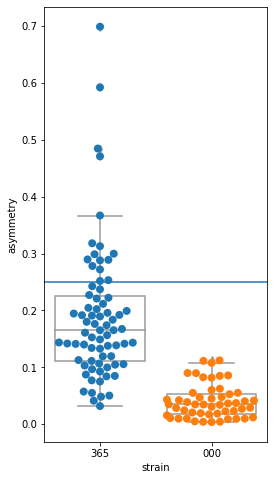

In [4]:
fig = plt.figure(figsize=(4, 8))
sns.swarmplot(x="strain", y="asymmetry", data=data_length, s=8)
sns.boxplot(x="strain", y="asymmetry", data=data_length, color="white")
plt.hlines(0.25, xmin=-3, xmax=3)
plt.savefig("./__dist-asymmetry-index.png")
plt.savefig("./__dist-asymmetry-index.pdf")
print(data_length.loc[data_length["strain"] == "365"])
print(data_length.loc[data_length["strain"] == "000"])

In [6]:
from scipy import stats
stats.ttest_ind(data_length.loc[data_length["strain"]=="000"]["asymmetry"], data_length.loc[data_length["strain"]=="365"]["asymmetry"], equal_var=False)

Ttest_indResult(statistic=-10.320957941820279, pvalue=1.0268496837398253e-16)